<a href="https://www.kaggle.com/code/cicinguyen/investment-analysis-and-portfolio-building?scriptVersionId=140728810" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-companies-details/Top_1000_Companies_Dataset.csv


# <p style="text-align:center;"><span style="color:brown;"> 💰 Investment Analysis and Portfolio Building </span></p>

<div style="text-align:center">
<img src="https://images.pexels.com/photos/730547/pexels-photo-730547.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1" alt="Image"/>
</div>


# <span style="color:red;"> Objective </span>

<span style="font-size:18px;"> The primary goal of this project is to construct an investment portfolio consisting of a selection of companies. The selection will be based on data attributes such as valuation, total funding, and growth percentage. By leveraging these data points, we aim to curate a diversified portfolio that optimizes the potential for attractive returns while managing risk. The portfolio will be designed to align with the investor's risk tolerance and investment objectives, aiming to strike a balance between potential gains and exposure to fluctuations in company performance. Through thorough analysis and strategic allocation, we intend to build a portfolio that aligns with the investor's financial goals and risk appetite. </span>

# <span style="color:red;"> Data Overview </span>

### <span style="color:brown;"> 1. Read data </span>

In [2]:
df = pd.read_csv('/kaggle/input/top-1000-companies-details/Top_1000_Companies_Dataset.csv')
df.head()

,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,...,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
0,OpenAI,openai.com,San Francisco,CA,United States,655,http://www.linkedin.com/company/openai,2015.0,AI,1,...,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",NaN,NaN,2.900000e+10,$11B,https://www.growjo.com/company/OpenAI,https://www.indeed.com/jobs?q=company%3A(OpenAI),118%,For Contact Direct Phone Numbers and Emails se...
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,http://www.linkedin.com/company/alchemyinc,NaN,Fintech,2,...,NaN,"Lightspeed, Silver Lake",NaN,NaN,1.020000e+10,$564M,https://www.growjo.com/company/Alchemy,https://www.indeed.com/jobs?q=company%3A(Alchemy),134%,For Contact Direct Phone Numbers and Emails se...
2,dbt Labs,getdbt.com,Philadelphia,PA,United States,511,http://www.linkedin.com/company/dbtlabs,2016.0,Analytics,3,...,NaN,Altimeter,NaN,NaN,4.200000e+09,$414.4M,https://www.growjo.com/company/dbt_Labs,https://www.indeed.com/jobs?q=company%3A(dbt L...,76%,For Contact Direct Phone Numbers and Emails se...
3,Wasabi Technologies,wasabi.com,Boston,MA,United States,355,http://www.linkedin.com/company/wasabitechnolo...,2017.0,Cloud,4,...,saas,L2 Point,NaN,NaN,1.100000e+09,$286.2M,https://www.growjo.com/company/Wasabi_Technolo...,https://www.indeed.com/jobs?q=company%3A(Wasab...,60%,For Contact Direct Phone Numbers and Emails se...
4,Whatnot,whatnot.com,Los Angeles,CA,United States,551,http://www.linkedin.com/company/whatnot-inc,2019.0,eCommerce,5,...,NaN,DST Global,NaN,NaN,3.700000e+09,$484.7M,https://www.growjo.com/company/Whatnot,https://www.indeed.com/jobs?q=company%3A(Whatnot),97%,For Contact Direct Phone Numbers and Emails se...


### <span style="color:brown;"> 2. Descriptive Statistics </span>

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_name        1000 non-null   object 
 1   url                 999 non-null    object 
 2   city                999 non-null    object 
 3   state               812 non-null    object 
 4   country             994 non-null    object 
 5   employees           1000 non-null   int64  
 6   linkedin_url        997 non-null    object 
 7   founded             791 non-null    float64
 8   Industry            997 non-null    object 
 9   GrowjoRanking       1000 non-null   int64  
 10  Previous Ranking    1000 non-null   int64  
 11  estimated_revenues  972 non-null    float64
 12  job_openings        938 non-null    float64
 13  keywords            368 non-null    object 
 14  LeadInvestors       424 non-null    object 
 15  Accelerator         12 non-null     object 
 16  btype  

,employees,founded,GrowjoRanking,Previous Ranking,estimated_revenues,job_openings,valuation
count,1000.000000,791.000000,1000.000000,1000.000000,9.720000e+02,938.000000,4.680000e+02
mean,319.579000,2012.544880,500.500000,504.007000,1.380356e+08,8.573561,2.259308e+09
std,232.428007,12.326577,288.819436,290.629204,8.448706e+08,28.327318,4.708617e+09
min,22.000000,1854.000000,1.000000,1.000000,1.518000e+06,1.000000,1.000000e+06
25%,130.750000,2012.000000,250.750000,252.750000,2.436000e+07,1.000000,8.975000e+08
50%,246.000000,2015.000000,500.500000,504.500000,4.742900e+07,1.000000,1.200000e+09
75%,466.500000,2017.500000,750.250000,754.250000,9.779318e+07,5.000000,2.011000e+09
max,995.000000,2022.000000,1000.000000,1007.000000,2.068482e+10,660.000000,5.302100e+10


### <span style="color:brown;"> 3. Data Preprocessing</span>

#### 3.1 Check for Duplicates

In [4]:
duplicated_data = df.duplicated().any()
duplicated_data

False

#### 3.2 Check for Missing Values

In [5]:
df.isnull().sum()

company_name            0
url                     1
city                    1
state                 188
country                 6
employees               0
linkedin_url            3
founded               209
Industry                3
GrowjoRanking           0
Previous Ranking        0
estimated_revenues     28
job_openings           62
keywords              632
LeadInvestors         576
Accelerator           988
btype                 922
valuation             532
total_funding         323
product_url             0
indeed_url              0
growth_percentage       0
contact_info            0
dtype: int64

In [6]:
#drop accelerator, btype
df = df.drop(['Accelerator', 'btype'], axis=1)

#### 3.3 Data Conversion

In [7]:
#Convert growth_percentage to float
df['growth_percentage'] = df['growth_percentage'].str.rstrip('%').astype(float)

In [8]:
import re

def convert_funding_to_numeric(funding_str):
    if pd.isnull(funding_str):
        return None
    
    # Regular expression pattern to match the desired formats
    pattern = r'^([€£$CA])([\d.]+)[MB]$'
    
    match = re.match(pattern, funding_str)
    if match:
        currency = match.group(1)
        value = float(match.group(2))
        if 'B' in funding_str:
            multiplier = 1e9
        elif 'M' in funding_str:
            multiplier = 1e6
        else:
            return None
        
        if currency in ['$', 'CA']:
            return value * multiplier
        elif currency == '€':
            # Convert Euros to dollars (approximate conversion rate)
            return value * multiplier * 1.2  # Example conversion rate, adjust as needed
        elif currency == '£':
            # Convert British Pounds to dollars (approximate conversion rate)
            return value * multiplier * 1.4  # Example conversion rate, adjust as needed
        
    return None

df['total_funding'] = df['total_funding'].apply(convert_funding_to_numeric)

# Display the DataFrame
df.head()

# Display the DataFrame
df.head()

,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,...,estimated_revenues,job_openings,keywords,LeadInvestors,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
0,OpenAI,openai.com,San Francisco,CA,United States,655,http://www.linkedin.com/company/openai,2015.0,AI,1,...,88722200.0,25.0,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",2.900000e+10,1.100000e+10,https://www.growjo.com/company/OpenAI,https://www.indeed.com/jobs?q=company%3A(OpenAI),118.0,For Contact Direct Phone Numbers and Emails se...
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,http://www.linkedin.com/company/alchemyinc,NaN,Fintech,2,...,39269750.0,1.0,NaN,"Lightspeed, Silver Lake",1.020000e+10,5.640000e+08,https://www.growjo.com/company/Alchemy,https://www.indeed.com/jobs?q=company%3A(Alchemy),134.0,For Contact Direct Phone Numbers and Emails se...
2,dbt Labs,getdbt.com,Philadelphia,PA,United States,511,http://www.linkedin.com/company/dbtlabs,2016.0,Analytics,3,...,76987400.0,1.0,NaN,Altimeter,4.200000e+09,4.144000e+08,https://www.growjo.com/company/dbt_Labs,https://www.indeed.com/jobs?q=company%3A(dbt L...,76.0,For Contact Direct Phone Numbers and Emails se...
3,Wasabi Technologies,wasabi.com,Boston,MA,United States,355,http://www.linkedin.com/company/wasabitechnolo...,2017.0,Cloud,4,...,38480000.0,4.0,saas,L2 Point,1.100000e+09,2.862000e+08,https://www.growjo.com/company/Wasabi_Technolo...,https://www.indeed.com/jobs?q=company%3A(Wasab...,60.0,For Contact Direct Phone Numbers and Emails se...
4,Whatnot,whatnot.com,Los Angeles,CA,United States,551,http://www.linkedin.com/company/whatnot-inc,2019.0,eCommerce,5,...,39664000.0,1.0,NaN,DST Global,3.700000e+09,4.847000e+08,https://www.growjo.com/company/Whatnot,https://www.indeed.com/jobs?q=company%3A(Whatnot),97.0,For Contact Direct Phone Numbers and Emails se...


# <span style="color:red;"> Data Visualization </span>

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


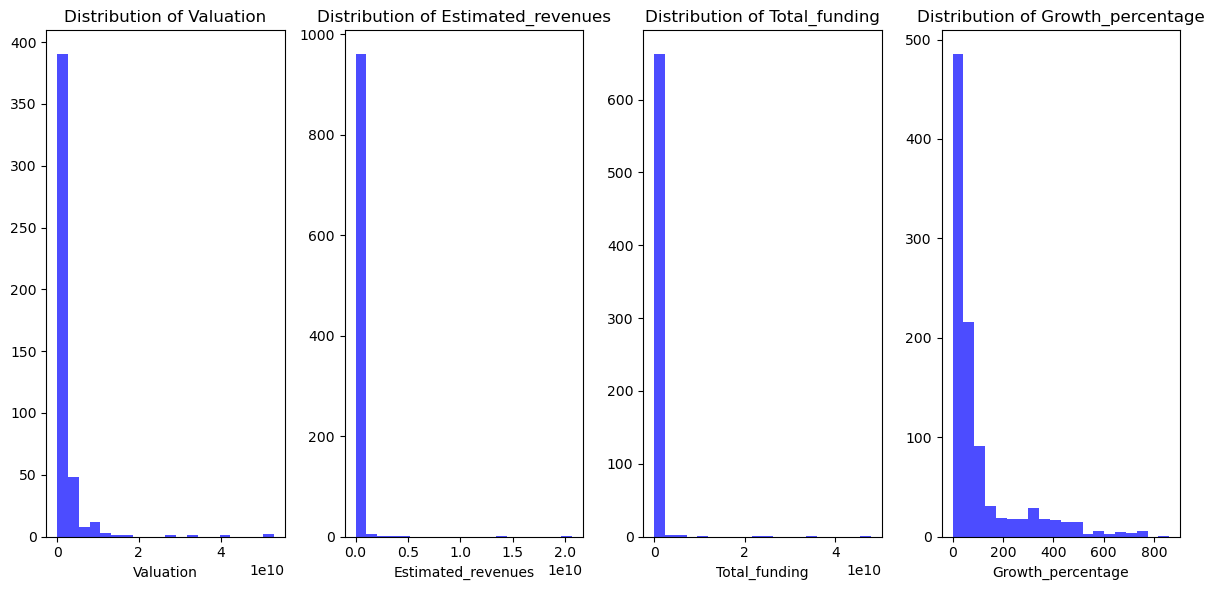

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

features =['valuation', 'estimated_revenues', 'total_funding', 'growth_percentage']
# Visualize distributions
plt.figure(figsize=(12,6))
for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    plt.hist(df[feature].dropna(), bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


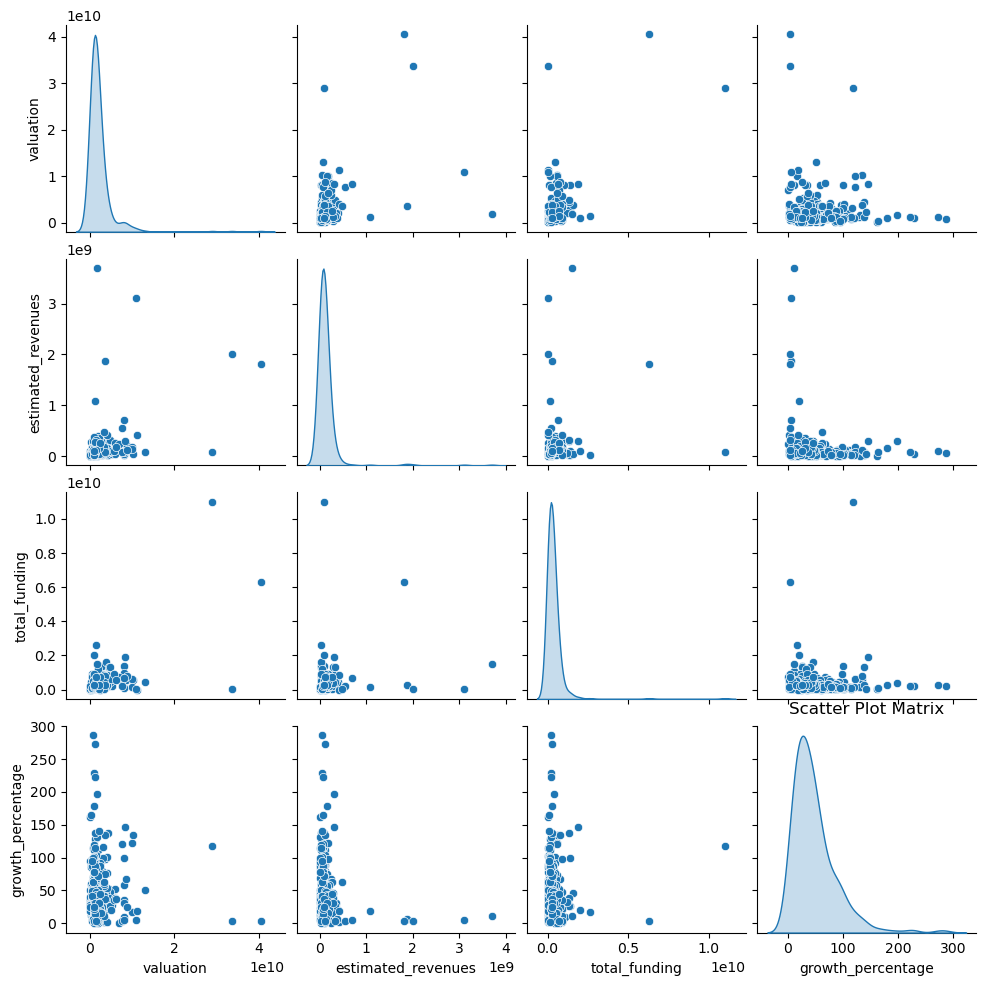

In [10]:
#Scatter plot
sns.pairplot(df[features].dropna(), diag_kind='kde')
plt.title('Scatter Plot Matrix', y=1.02)
plt.show()

# <span style="color:red;"> Industry Analysis </span>

### <span style="color:brown;"> 1. Distribution of Companies Across Industries </span>

In [11]:
import plotly.express as px

industry_count = df['Industry'].value_counts()
industry_df = pd.DataFrame({'Industry': industry_count.index, 'Company Counts': industry_count.values})
industry_df = industry_df.sort_values(by='Company Counts', ascending=False)

fig = px.treemap(industry_df, path=['Industry'], values='Company Counts', title='Distribution of Companies Across Industries')
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))  
fig.show()

### <span style="color:brown;"> 2. Top Industries by Valuation </span>

         Industry     valuation
0  Transportation  5.700000e+09
1              AI  4.311111e+09
2    DeliveryTech  4.100000e+09
3  NoCode/LowCode  4.000000e+09
4         Fintech  3.842143e+09
5          Gaming  3.500000e+09
6     Electronics  3.300000e+09
7        Software  2.725000e+09
8  Semiconductors  2.500000e+09
9     IT Security  2.354545e+09


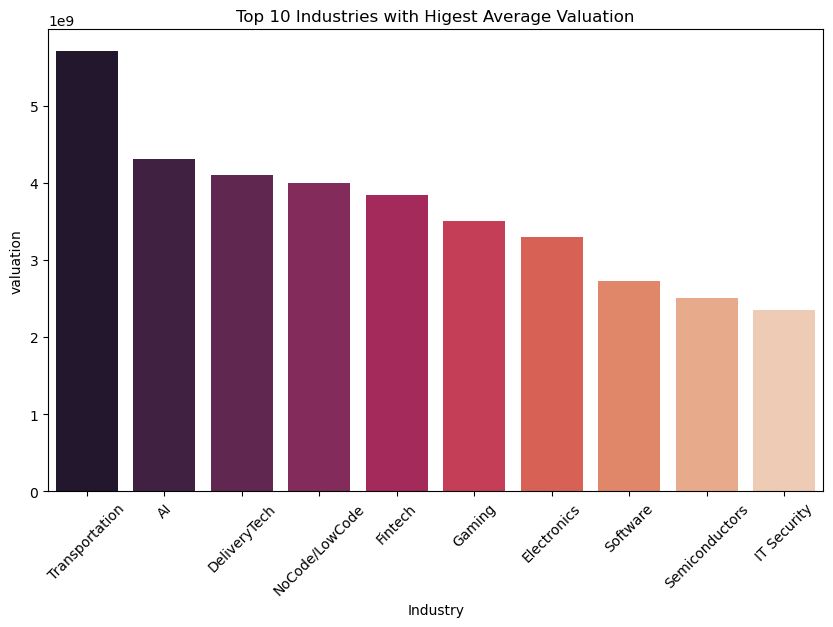

In [12]:
#Top 10 industries
top_industries = df.dropna().groupby('Industry')['valuation'].mean().nlargest(10).reset_index()
print(top_industries.head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=top_industries, x='Industry', y='valuation', palette='rocket')
plt.title('Top 10 Industries with Higest Average Valuation')
plt.xticks(rotation=45)
plt.show()

### <span style="color:brown;"> 3. Valuation Distribution by Industry </span>

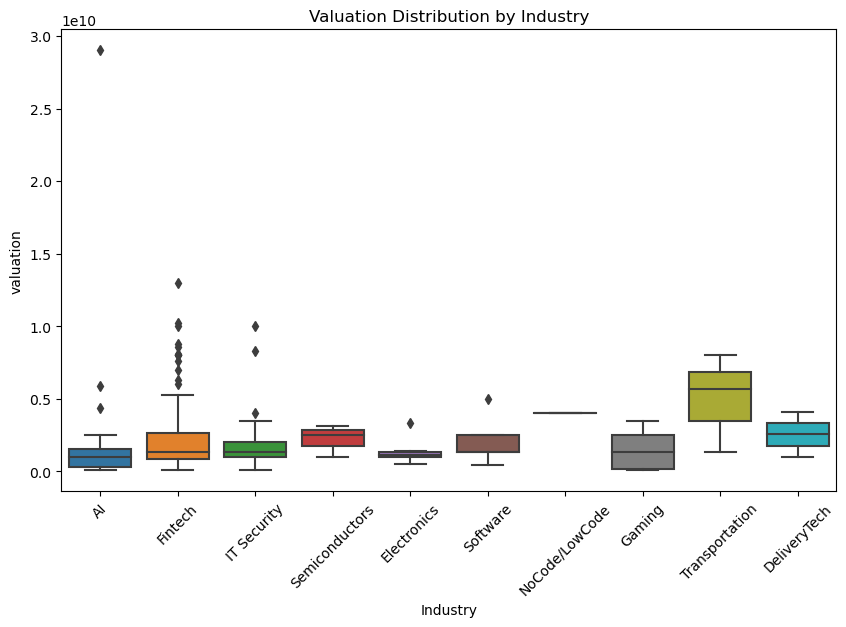

In [13]:
filtered_df = df[df['Industry'].isin(top_industries['Industry'])]
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Industry', y='valuation')
plt.xticks(rotation=45)
plt.title('Valuation Distribution by Industry')
plt.show()

# <span style="color:red;"> Company Analysis </span>

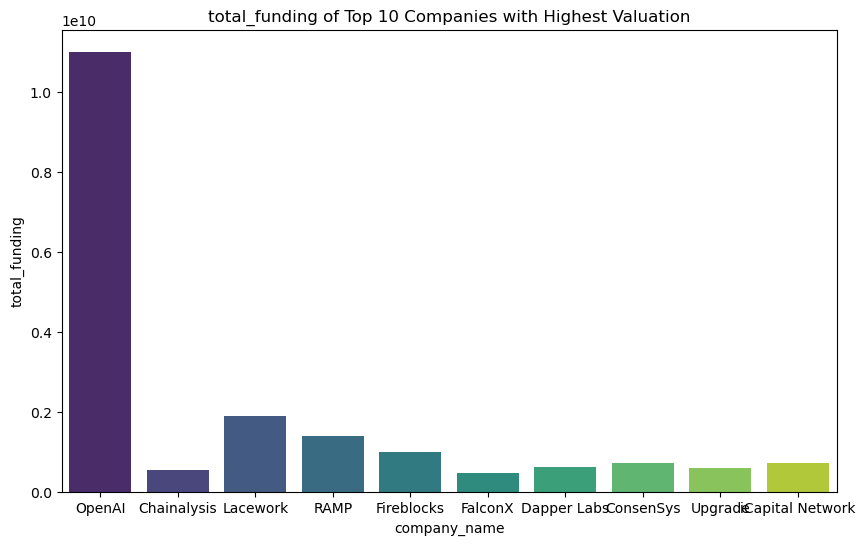

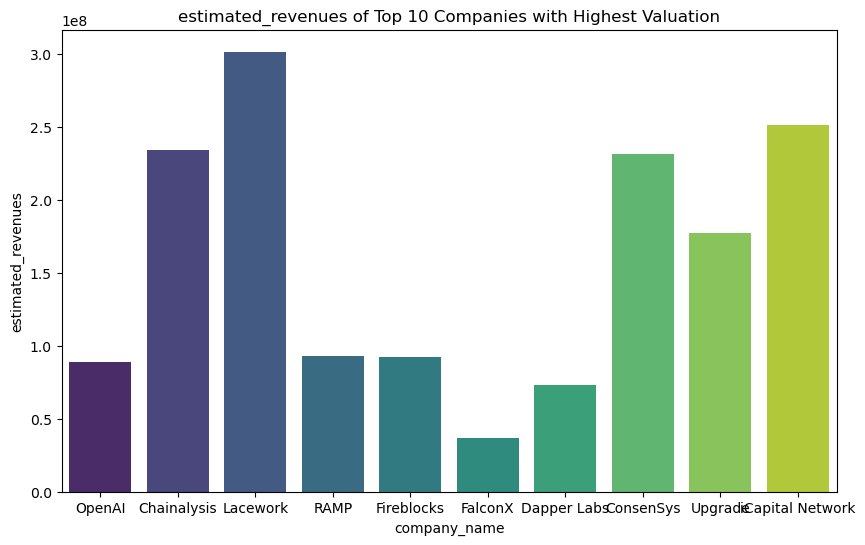

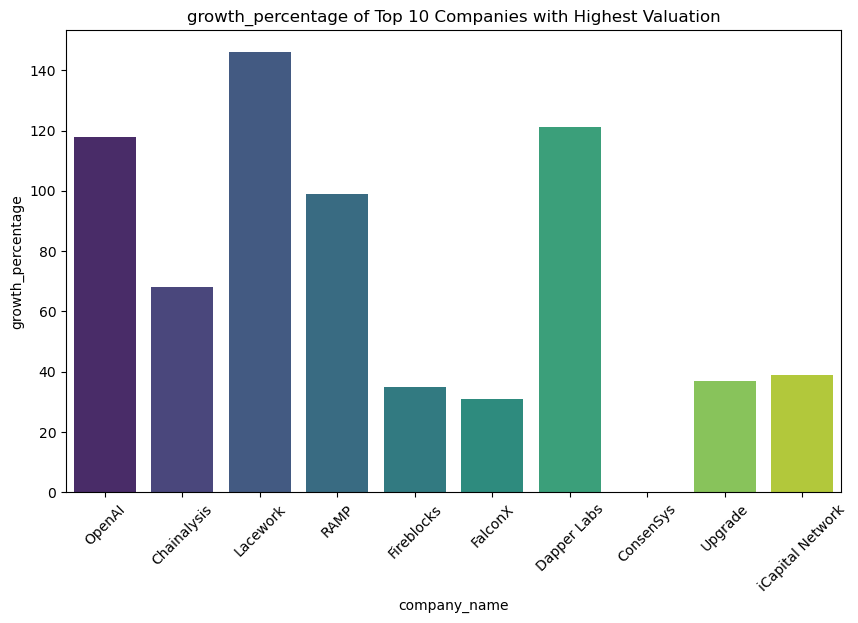

In [14]:
#Top 10 companies with highest valuation 
key_features = ['total_funding', 'estimated_revenues', 'growth_percentage']
top_10_company = df.dropna().nlargest(10, 'valuation')
for i in key_features:
    plt.figure(figsize=(10,6))
    sns.barplot(data=top_10_company, x='company_name', y=i, palette='viridis')
    plt.title(f'{i} of Top 10 Companies with Highest Valuation')
plt.xticks(rotation=45)
plt.show()


# <span style="color:red;"> Geography Analysis </span>

### <span style="color:brown;"> 1. Distribution of Companies by City, State and Country </span>

In [15]:
df['country'] = df['country'].replace('USA', 'United States')
geo_df = df.groupby(['country', 'state', 'city']).size().reset_index(name='count')

fig = px.treemap(geo_df, path=['country', 'state', 'city'], values='count',
                 labels={'city': 'City', 'state':'State','country':'Country', 'count':'Number of Companies'},
                 title='Hierarchical Treemap: Companies by Country, State, and City')
                
fig.show()


In [16]:
import plotly.express as px

# Create a DataFrame with top 20 countries and their total valuation
top_countries = df.groupby('country')['valuation'].sum().nlargest(20).reset_index()

# Calculate company counts by country
company_count_by_country = df['country'].value_counts().reset_index()
company_count_by_country.columns = ['country', 'company_count']

# Merge company counts into the top_countries DataFrame
top_countries = top_countries.merge(company_count_by_country, on='country')

# Create the choropleth map
fig = px.choropleth(top_countries, 
                    locations='country', 
                    locationmode='country names',
                    color='valuation',
                    hover_name='country',
                    hover_data=['company_count'],  # Add company count to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Choropleth Map of Top 20 Countries by Total Valuation')

# Custom hover template
hover_template = '<b>%{hovertext}</b><br>' + \
                 'Valuation: $%{z:.2f}<br>' + \
                 'Company Count: %{customdata}'
fig.update_traces(hovertemplate=hover_template)

fig.show()


# <span style="color:red;"> Correlation between features </span>

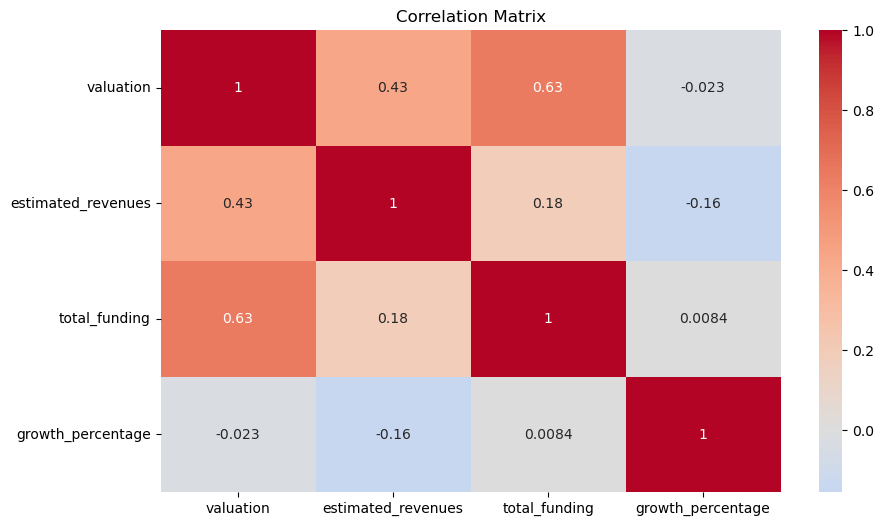

In [17]:
# Correlation
corr_matrix = df[features].dropna().corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

<span style="font-size:18px;"> From the heatmap, the features are not well correlated at all. The highest coefficient is between valuation and total_funding, which is 0.63. 
The moderate correlations between valuation and total funding/estimated_revenue indicate that there are connections between the variables, but they might not be strictly linear. </span>
    
<span style="font-size:18px;"> *Let's carry on with all of the features!* </span>

# <span style="color:red;"> Portfolio Building </span>

### <span style="color:brown;"> 1. Define Investment Criteria </span>

<span style="font-size:18px;"> The seleted criteria include high valuation, strong historical growth, and promising industry. </span>

In [18]:
# Define criteria
port_criteria = ['company_name', 'valuation', 'growth_percentage']

### <span style="color:brown;"> 2. Filter Companies </span>

<span style="font-size:18px;"> Select companies with high valuations, significant historical growth rates, and strong industry presence. </span>

### <span style="color:brown;"> 3. Sort and Rank </span>

<span style="font-size:18px;"> Rank the filtered companies based on the criteria defined above. </span>

In [19]:
# Filter and sort companies
port_company = df.sort_values(by=port_criteria, ascending=False).head(10)

### <span style="color:brown;"> 4. Diversification </span>

<span style="font-size:18px;"> Diversify portfolio by selecting companies from different industries or sectors. Diversification helps manage risk and can provide a more balanced portfolio. </span>

In [20]:
# Group companies by industry and select top company from each industry
port_company = port_company.groupby('Industry', group_keys=False).apply(lambda x: x.nlargest(1, 'valuation'))

In [21]:
print("Selected Portforlio Companies:")
print(port_company[['company_name', 'valuation', 'growth_percentage']])

Selected Portforlio Companies:
         company_name     valuation  growth_percentage
421           solo.io  1.000000e+09              119.0
257             inkuA           NaN              708.0
283        reMarkable  1.000000e+09               43.0
431  iCapital Network  6.000000e+09               39.0
265             wefox  4.500000e+09               39.0
183        prezent.ai  1.000000e+08              102.0


### <span style="color:brown;"> 5. Calculate Allocation </span>

<span style="font-size:18px;"> Calculate the allocation for each company. Allocation refers to the portion of your total investment that you'll allocate to each company in the portfolio. 
This step helps distribute the investment across different companies based on their valuations. </span>

In [22]:
# Calculate allocation for each company
total_invest = 1000000
port_company['allocation'] = (port_company['valuation']/port_company['valuation'].sum()) * total_invest

print("\nAllocation for Each Company:")
print(port_company[['company_name', 'allocation']])


Allocation for Each Company:
         company_name     allocation
421           solo.io   79365.079365
257             inkuA            NaN
283        reMarkable   79365.079365
431  iCapital Network  476190.476190
265             wefox  357142.857143
183        prezent.ai    7936.507937


### <span style="color:brown;"> 6. Calculating Log Returns and Portfolio Metrics </span>

<span style="font-size:18px;"> Log returns are used to measure the percentage change in the value of an investment over time. </span>

<span style="font-size:18px;"> Portfolio expected return and volatility are crucial metrics in portfolio analysis. Expected return shows the potential profit or loss, while volatility measures the degree of risk or uncertainty associated with the portfolio. </span>

In [23]:
import numpy as np
from scipy.optimize import minimize

# Calculate log returns for each company
log_returns = np.log(1 + port_company['growth_percentage'] / 100)
# Calculate portfolio expected return and volatility
weights = port_company['allocation'] / total_invest
portfolio_return = np.sum(weights * log_returns.mean())

# Calculate covariance matrix
cov_matrix = np.cov(log_returns, rowvar=False)

# Calculate portfolio volatility
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

print("\nPortfolio Expected Return:", portfolio_return)
print("Portfolio Volatility:", portfolio_volatility)


Portfolio Expected Return: 0.765445477721924
Portfolio Volatility: nan


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
              📝Portfolio Expected Return: The portfolio's expected return is approximately 0.776, which means that, on average, you can expect the portfolio to yield a return of around 77.6% over a given period. This value is based on the weighted average of the expected returns of the individual companies in the portfolio.

Portfolio Volatility: The portfolio's volatility is indicated by "nan," which stands for "Not a Number." This typically occurs when the covariance matrix is not positive definite, indicating that the portfolio is not properly diversified. In portfolio optimization, it's essential to ensure that the covariance matrix is well-defined and positive definite. This could be due to the small number of companies or the covariance structure of the companies in the portfolio.
</p>
</div>


### <span style="color:brown;"> 7. Objective Function for Portorlio Optimization </span>

<span style="font-size:18px;"> Define the objective function to optimize. In this case, we're maximizing the Sharpe Ratio, which is a measure of risk-adjusted return. </span>
<span style="font-size:18px;"> The Sharpe Ratio accounts for both expected return and volatility, finding a balance between risk and reward. </span>

In [24]:
# Define the objective function for portfolio optimization
def objective(weights):
    port_return = np.sum(weights * log_returns.mean())
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(np.cov(log_returns, rowvar=False), weights)))
    return -port_return / port_volatility

### <span style="color:brown;"> 8. Define Contraints </span>

<span style="font-size:18px;"> Constraints ensure that the optimization process adheres to certain rules. Here, I'm setting a constraint that the sum of allocation weights should be equal to 1 (representing 100% of investment). </span>

In [25]:
# Define constraints and initial weights
constraints = tuple((0, 1) for _ in range(len(port_company)))
initial_weights = np.ones(len(port_company)) / len(port_company)

### <span style="color:brown;"> 9. Initial Weights for Optimization </span>

<span style="font-size:18px;"> The optimization process starts with initial equal weights for each company. This is a common starting point, but the optimization algorithm will adjust these weights to find the optimal solution. </span>

In [26]:
# Portfolio optimization
result = minimize(objective, initial_weights, method='SLSQP', bounds=constraints)
optimal_weights = result.x

### <span style="color:brown;"> 10. Displaying Optimal Portfolio Allocation </span>

In [27]:
print("\nOptimal Portfolio Allocation:")
for i in range(len(port_company)):
    print(f"{port_company['company_name'].iloc[i]}: {optimal_weights[i]:.2%}")



Optimal Portfolio Allocation:
solo.io: 16.67%
inkuA: 16.67%
reMarkable: 16.67%
iCapital Network: 16.67%
wefox: 16.67%
prezent.ai: 16.67%


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
              📝Optimal Portfolio Allocation: The allocation percentages for each company in the portfolio sum up to 100%. The optimization algorithm is attempting to find the allocation that maximizes the Sharpe ratio, which is the ratio of expected return to volatility. The optimal allocations are designed to balance risk and reward to achieve the best possible risk-adjusted return.
</p>
</div>
